1. Importing Libraries

In [89]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

2. Load and Analyse Dataset

In [90]:
data=pd.read_csv(r"C:\Users\lenovo\Downloads\AmesHousing.csv")
print(data.head())

print(data.info())

print(data.shape)

print(data.columns)

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

3. Find Missing Values, Categorical Columns


In [91]:
missing_val=data.isnull().sum()
print(missing_val)

non_numeric_cols = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64
Non-numeric columns: Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')


4. Analyse Data Distribution among Features

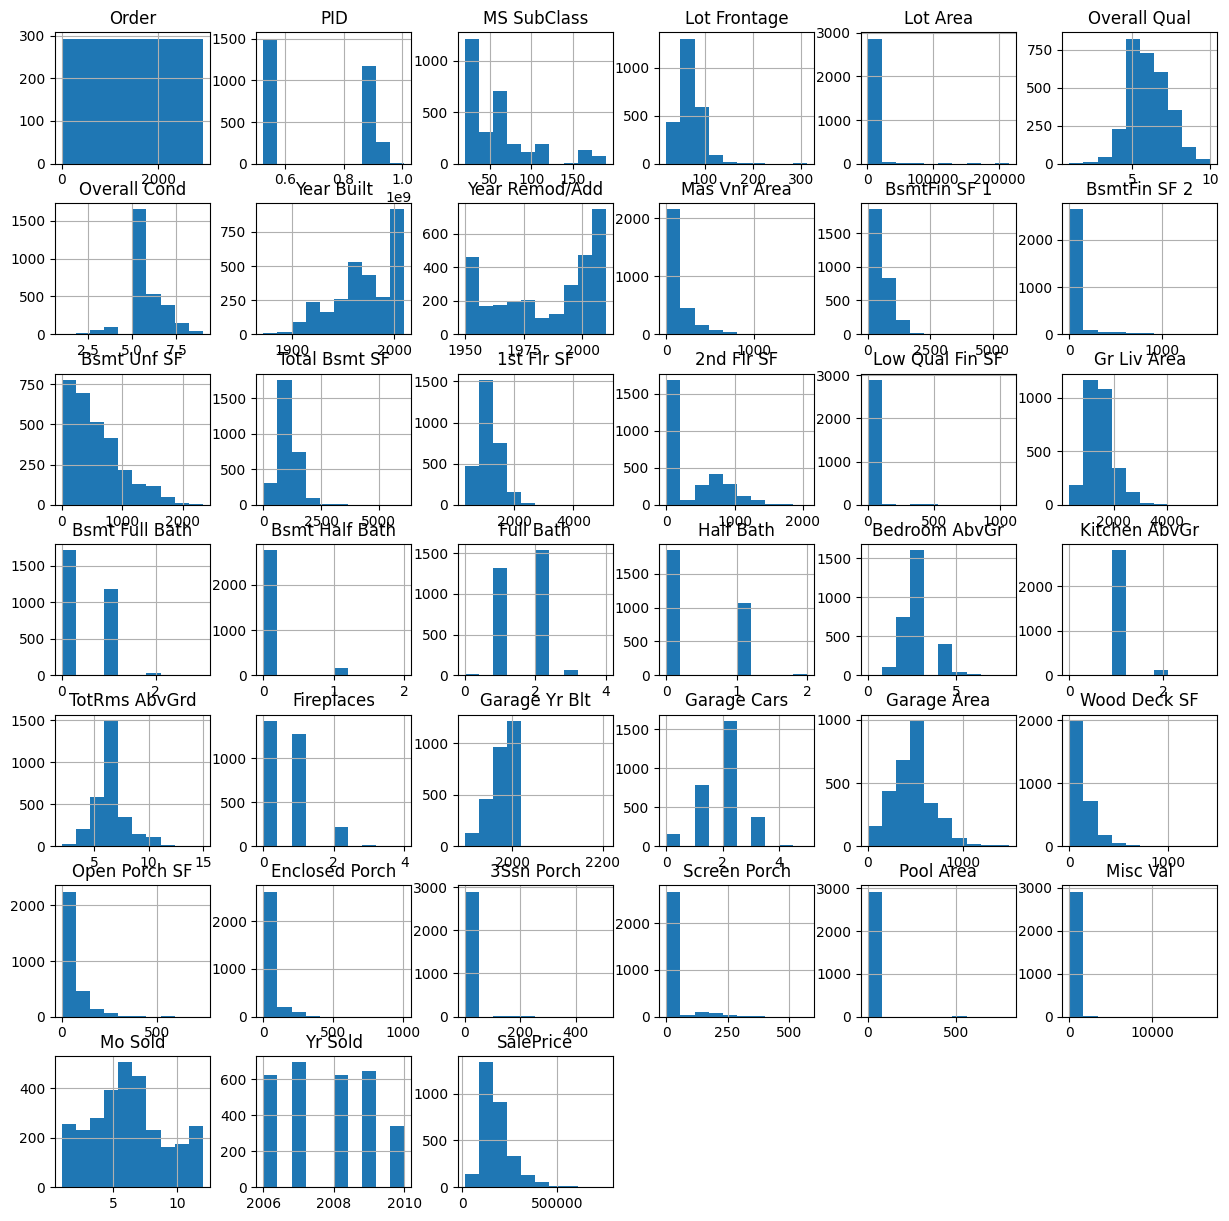

In [92]:
data.hist(figsize=(15, 15))
plt.show()

5. Handle Missing Values(Preprocessing)

In [93]:
#impute numerical values with median
data['Lot Frontage'].fillna(data['Lot Frontage'].median(), inplace=True)
data['Garage Area'].fillna(data['Garage Area'].median(), inplace=True)

#impute categorical features with most frequently occuring entry
data['Garage Type'].fillna(data['Garage Type'].mode()[0], inplace=True)
data['Bsmt Qual'].fillna(data['Bsmt Qual'].mode()[0], inplace=True)

#fill null values 
data['Pool Area'].fillna(0, inplace=True)
data['Garage Cars'].fillna(0, inplace=True)

5. Remove Irrelevant Features

In [94]:
#deleting columns with less importance
data.drop(columns=['Alley', 'Fence', 'Misc Feature'], inplace=True)
data = pd.get_dummies(data, columns=['MS Zoning', 'Neighborhood'], drop_first=True)


6. Handle Outliers

In [95]:
#to handle outliers
data['Lot Area'] = np.log1p(data['Lot Area'])
data['Gr Liv Area'] = np.log1p(data['Gr Liv Area'])
data['SalePrice'] = np.log1p(data['SalePrice'])

7. Encode Categorical Values

In [96]:
#convert categorical data into numerical
#ordinal encoding
quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
data['Exter Qual'] = data['Exter Qual'].map(quality_mapping)
data['Exter Cond'] = data['Exter Cond'].map(quality_mapping)
data['Bsmt Qual'] = data['Bsmt Qual'].map(quality_mapping)
data['Bsmt Cond'] = data['Bsmt Cond'].map(quality_mapping)
data['Kitchen Qual'] = data['Kitchen Qual'].map(quality_mapping)

#to convert remaining categorical values to numerical values
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


8. Scale Numerical Values

In [97]:
#to normalize data
scaler = StandardScaler()
num_features = ['Lot Area', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF']
data[num_features] = scaler.fit_transform(data[num_features])

9. Split Data into Training and Testing Sets

In [98]:
X=data.drop(['SalePrice'], axis=1)
y=data['SalePrice']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

10. Train the Random Forest Model

In [99]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

11. Accuracy Score

In [100]:
print("Model Accuracy:", forest.score(X_test, y_test))

Model Accuracy: 0.8843776388177793


12. Error Metrics

In [101]:
y_pred=forest.predict(X_test)
mae=mean_absolute_error(y_test, y_pred)
mse=np.mean((y_test-y_pred)**2)
rmse=np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error: ", rmse)

Mean Absolute Error: 0.08523767047227869
Mean Squared Error: 0.01790736023342455
Root Mean Squared Error:  0.13381838525936768


13. Visualisation

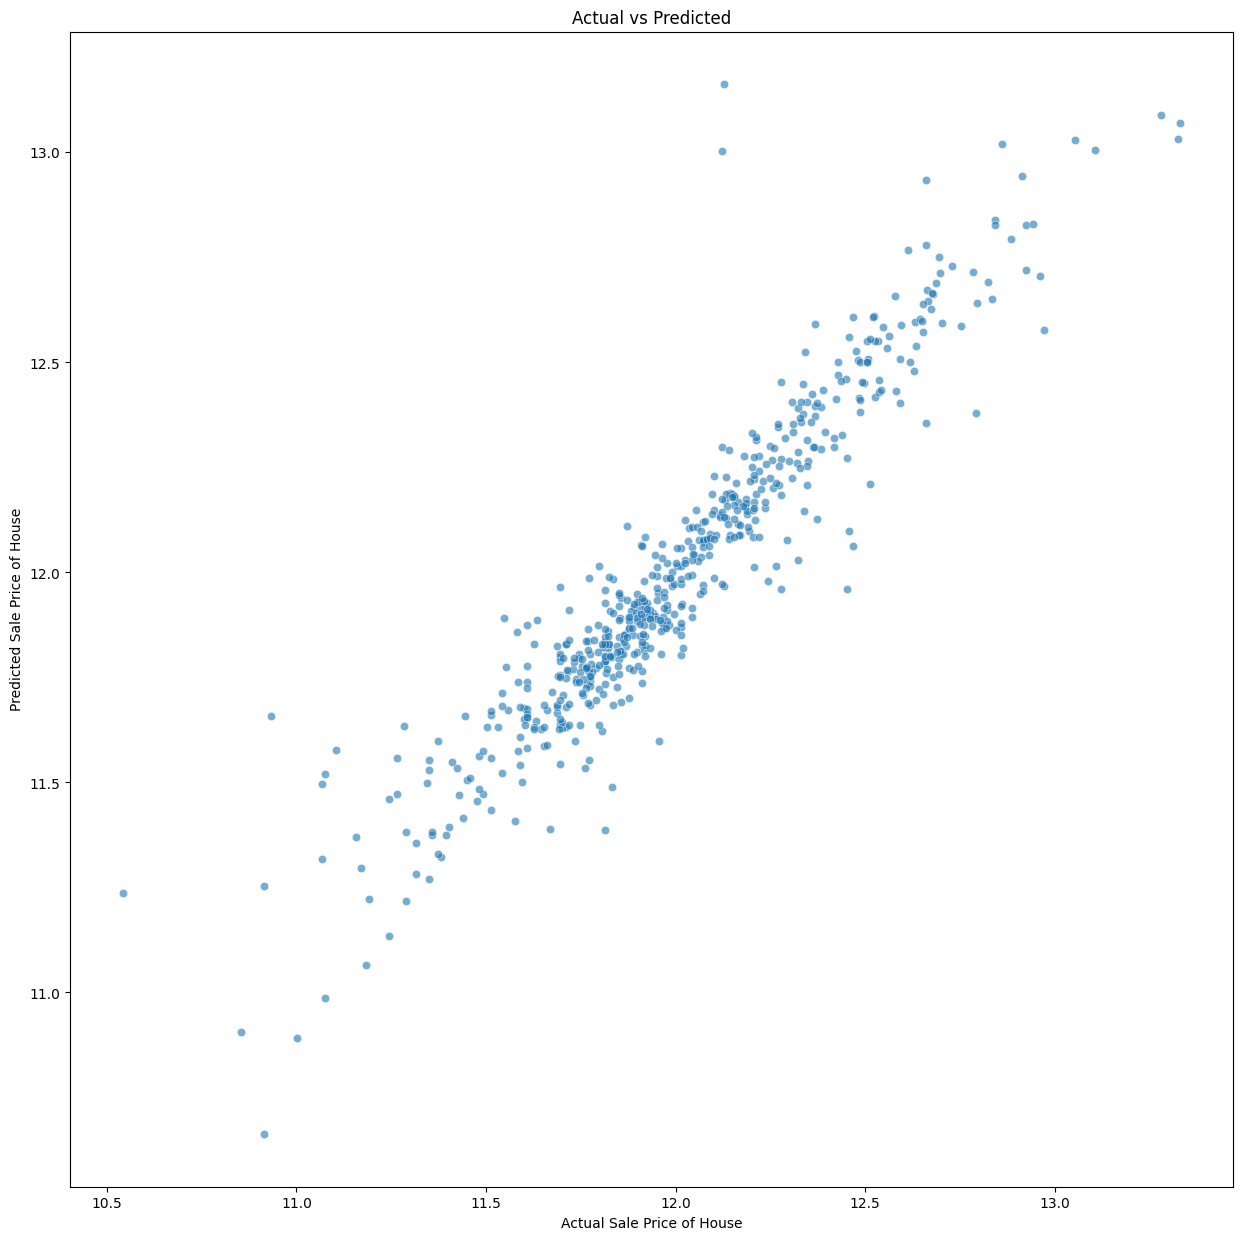

In [102]:
#comparing actual versus predicted values
plt.figure(figsize=(15,15))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Sale Price of House")
plt.ylabel("Predicted Sale Price of House")
plt.title("Actual vs Predicted")
plt.show()


14. Hyperparameter Tuning

In [104]:
#basic hyper parameter tuning
#defining parameter grid
parameters={
    'n_estimators': [100, 200, 300], #number of trees
    'max_depth': [10, 20, None], #depth of each tree
    'min_samples_split': [2, 5, 10]
}

#performs grid search (cross validation)
grid_search = GridSearchCV(RandomForestRegressor(), parameters, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

#to get the best model
print("Best Parameters:", grid_search.best_params_)
best = grid_search.best_estimator_

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
